# TASK #1: PROJECT OVERVIEW 


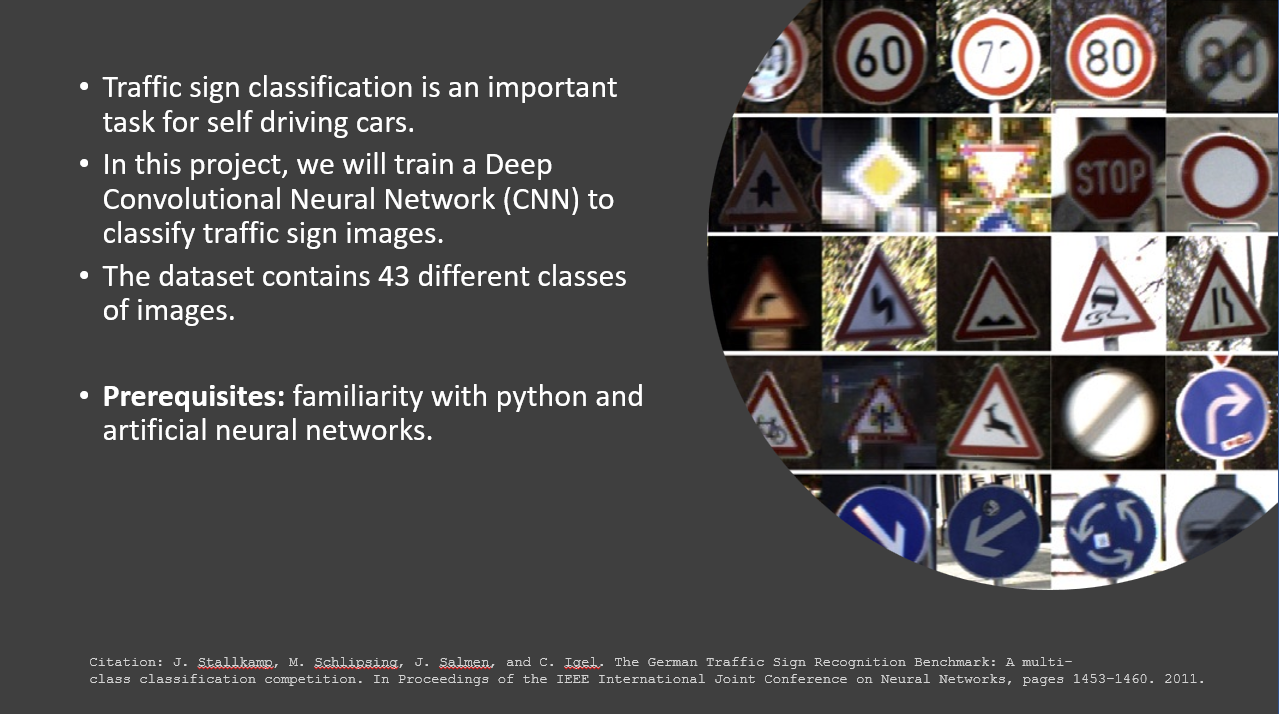

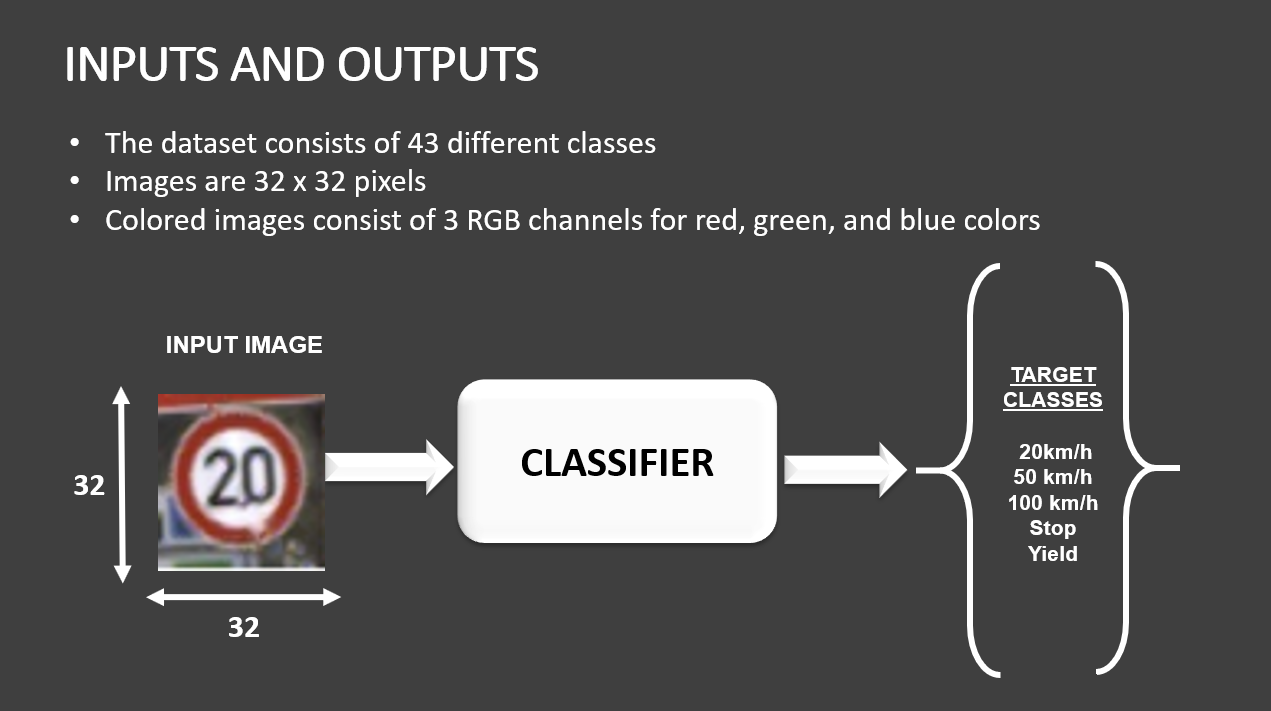

# TASK #2: IMPORT LIBRARIES/DATASETS

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import random

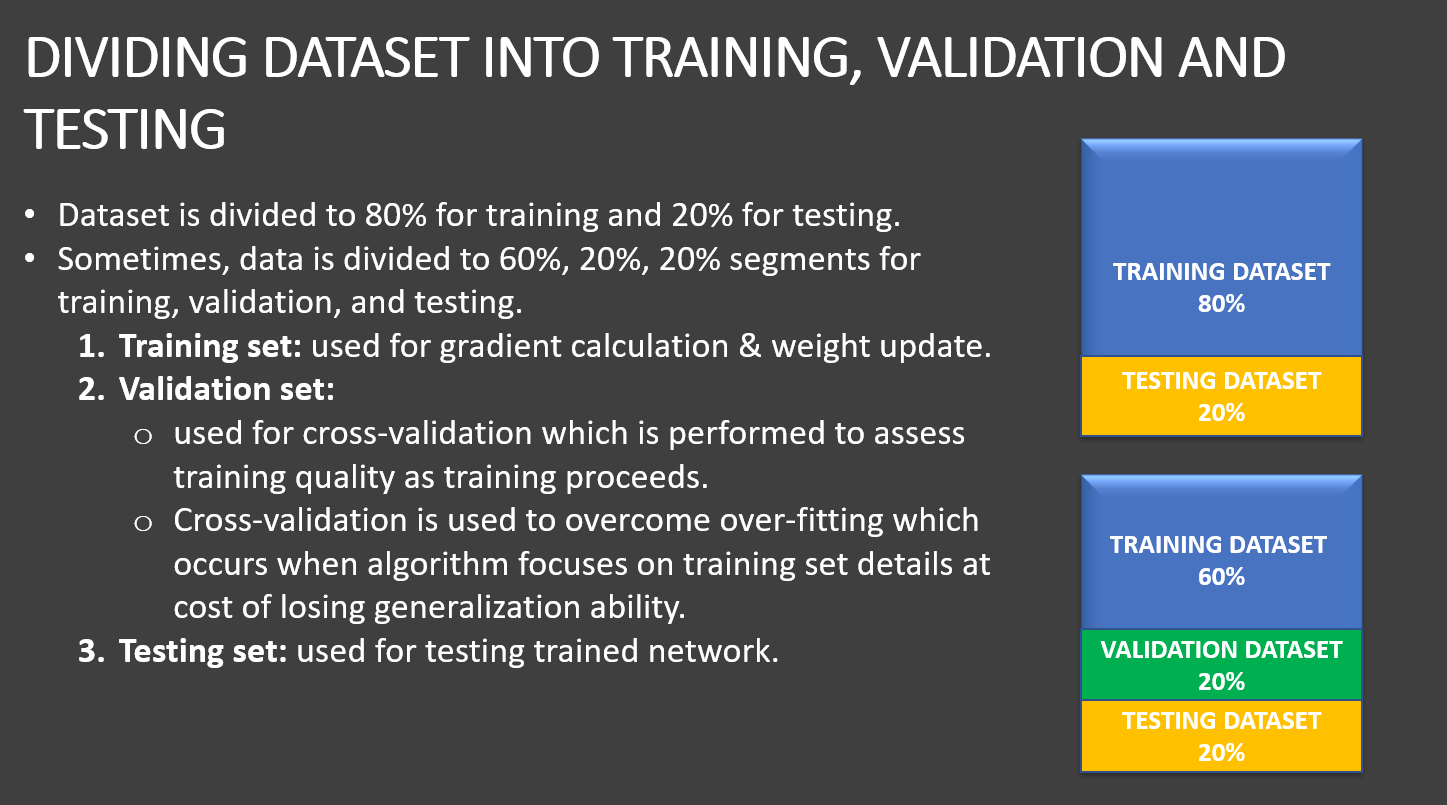

In [4]:
with open("train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [5]:
X_train,y_train = train['features'],train['labels']
X_validation,y_validation = valid['features'],valid['labels']
X_test,y_test = test['features'],test['labels']

In [6]:
X_train.shape

(34799, 32, 32, 3)

In [7]:
y_train.shape

(34799,)

In [8]:
X_validation.shape

(4410, 32, 32, 3)

In [9]:
y_validation.shape

(4410,)

In [10]:
X_test.shape

(12630, 32, 32, 3)

In [11]:
y_test.shape

(12630,)

# TASK #3: PERFORM IMAGES VISUALIZATION

Label :  35


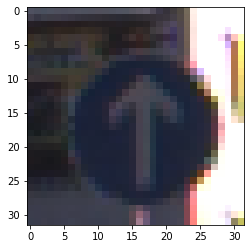

In [12]:
i = np.random.randint(0, len(X_train))
plt.imshow(X_train[i])
print('Label : ',y_train[i])

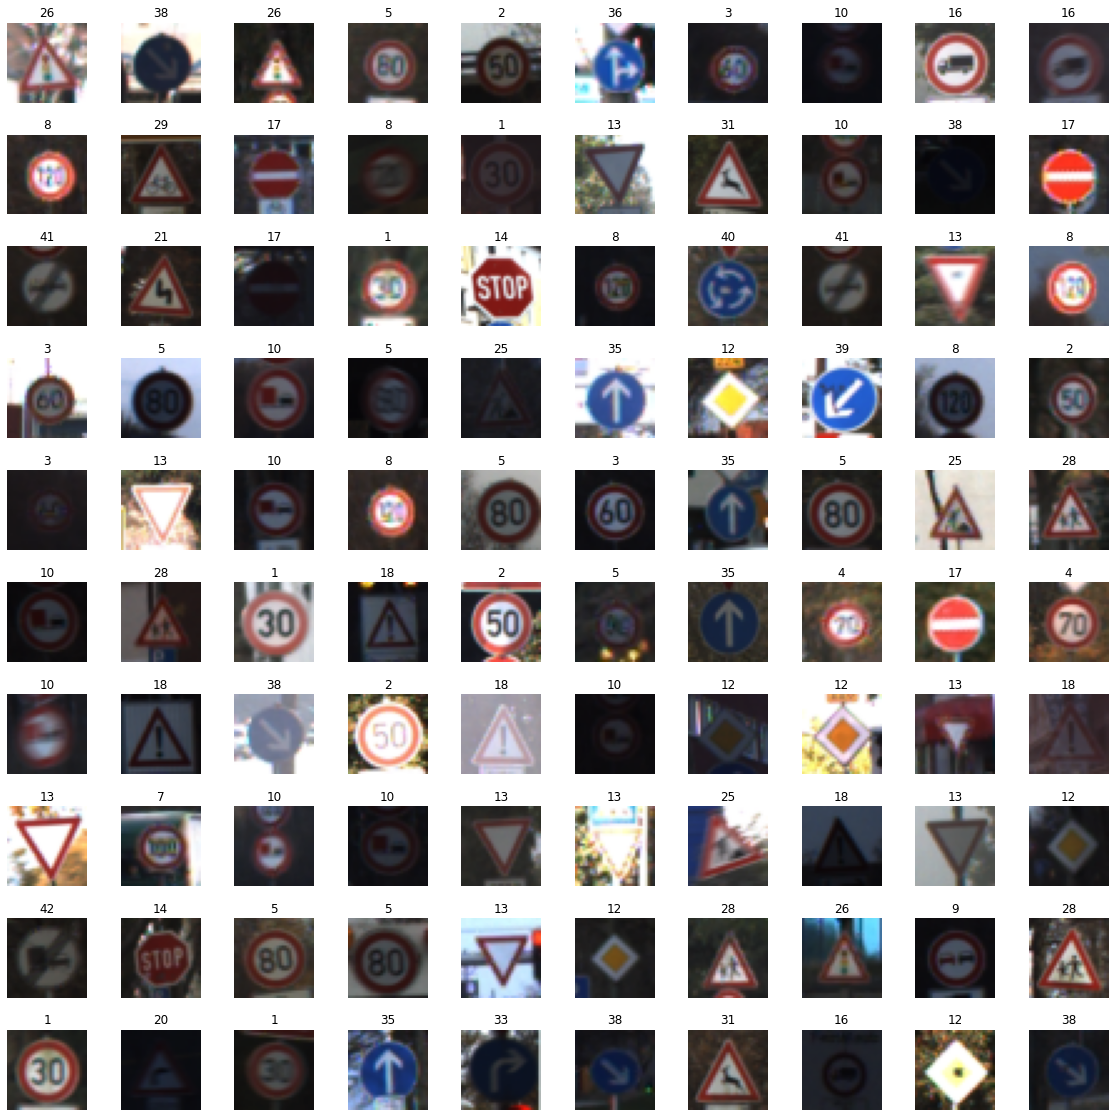

In [13]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 10
L_grid = 10

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (20,20))

axes = axes.ravel() # flaten the 5 x 5 matrix into 25 array

n_training = len(X_train) # get the length of the training dataset

# Select a random number from 0 to n_training
# create evenly spaces variables 
for i in np.arange(0,W_grid*L_grid):
    index = np.random.randint(0,n_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')
    # Select a random number
plt.subplots_adjust(hspace=0.4)   
    # read and display an image with the selected index    
    

        

# TASK #4: CONVERT IMAGES TO GRAYSCALE AND PERFORM NORMALIZATION

In [14]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [15]:
X_train_gray = np.sum(X_train/3 , axis=3, keepdims=True)

In [16]:
X_train_gray.shape

(34799, 32, 32, 1)

In [17]:
X_train_gray_norm =  (X_train_gray -128)/128

In [18]:
X_train_gray_norm

array([[[[-0.35677083],
         [-0.77083333],
         [-0.30989583],
         ...,
         [-0.38020833],
         [ 0.03385417],
         [-0.75520833]],

        [[-0.76041667],
         [-0.81510417],
         [-0.40104167],
         ...,
         [-0.41927083],
         [ 0.04427083],
         [-0.75      ]],

        [[-0.82291667],
         [-0.8359375 ],
         [-0.5078125 ],
         ...,
         [-0.48177083],
         [ 0.0546875 ],
         [-0.74739583]],

        ...,

        [[-0.2578125 ],
         [-0.7109375 ],
         [-0.77083333],
         ...,
         [-0.8515625 ],
         [-0.73958333],
         [ 0.0078125 ]],

        [[-0.41666667],
         [-0.71354167],
         [-0.77083333],
         ...,
         [-0.875     ],
         [-0.765625  ],
         [ 0.04427083]],

        [[-0.77864583],
         [-0.77604167],
         [-0.765625  ],
         ...,
         [-0.87760417],
         [-0.77604167],
         [ 0.06510417]]],


       [[[-0.734375  ],


In [19]:
X_test_gray = np.sum(X_test/3 , axis=3, keepdims=True)
X_test_gray_norm =  (X_test_gray -128)/128
X_validation_gray = np.sum(X_validation/3 , axis=3, keepdims=True)
X_validation_gray_norm =  (X_validation_gray -128)/128

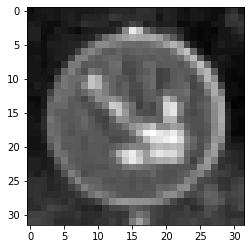

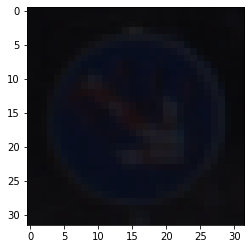

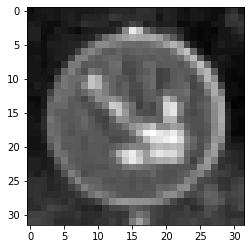

In [20]:
i = random.randint(1, len(X_train_gray))
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')

# TASK #5: UNDERSTAND THE THEORY AND INTUITION BEHIND CONVOLUTIONAL NEURAL NETWORKS 

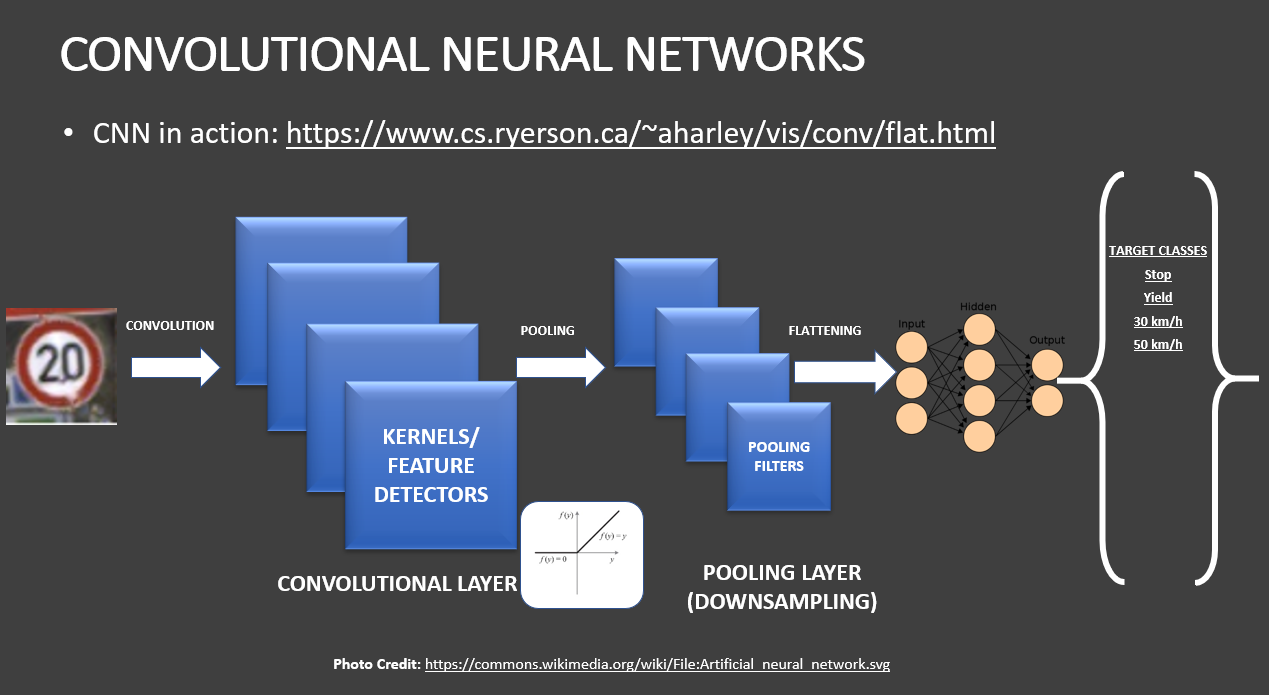

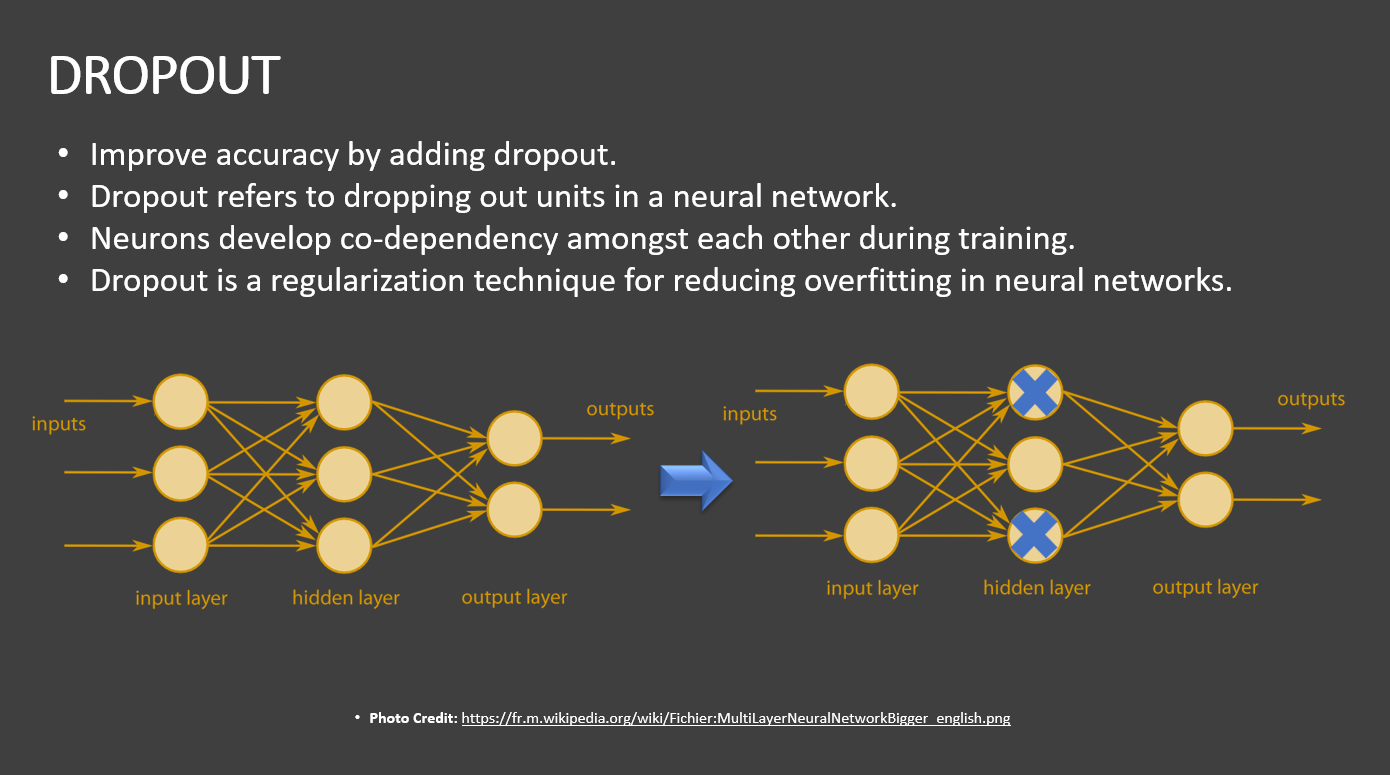

# TASK #6: BUILD DEEP CONVOLUTIONAL NEURAL NETWORK MODEL

In [21]:
from tensorflow.keras import datasets, layers, models

cnn = models.Sequential()

cnn.add(layers.Conv2D(32, (5,5), activation = 'relu', input_shape = (32,32,1)))
cnn.add(layers.Conv2D(32, (5,5), activation = 'relu'))
cnn.add(layers.AveragePooling2D())
cnn.add(layers.Dropout(0.2))

cnn.add(layers.Conv2D(32, (5,5), activation = 'relu'))
cnn.add(layers.Conv2D(32, (5,5), activation = 'relu'))
cnn.add(layers.MaxPooling2D())
cnn.add(layers.Dropout(0.2))

cnn.add(layers.Flatten())

cnn.add(layers.Dense(240, activation = 'relu'))
cnn.add(layers.Dropout(0.2))

cnn.add(layers.Dense(240, activation = 'relu'))

cnn.add(layers.Dense(43, activation = 'softmax'))
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        25632     
                                                                 
 average_pooling2d (AverageP  (None, 12, 12, 32)       0         
 ooling2D)                                                       
                                                                 
 dropout (Dropout)           (None, 12, 12, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 32)          25632     
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 32)          25632     
                                                        

# TASK #7: COMPILE AND TRAIN DEEP CNN MODEL

In [22]:
cnn.compile( optimizer= 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'] )

In [23]:
history = cnn.fit(X_train_gray_norm,y_train,batch_size=500,epochs=10,verbose=1,validation_data=(X_validation_gray_norm,y_validation))

Epoch 1/10
70/70 [==============================] - 55s 777ms/step - loss: 3.1960 - accuracy: 0.1474 - val_loss: 2.0592 - val_accuracy: 0.4120
Epoch 2/10
70/70 [==============================] - 54s 772ms/step - loss: 1.1401 - accuracy: 0.6563 - val_loss: 0.4635 - val_accuracy: 0.8626
Epoch 3/10
70/70 [==============================] - 52s 739ms/step - loss: 0.4669 - accuracy: 0.8558 - val_loss: 0.3186 - val_accuracy: 0.9020
Epoch 4/10
70/70 [==============================] - 51s 736ms/step - loss: 0.3067 - accuracy: 0.9050 - val_loss: 0.2125 - val_accuracy: 0.9390
Epoch 5/10
70/70 [==============================] - 51s 731ms/step - loss: 0.2309 - accuracy: 0.9308 - val_loss: 0.1789 - val_accuracy: 0.9476
Epoch 6/10
70/70 [==============================] - 51s 732ms/step - loss: 0.1792 - accuracy: 0.9470 - val_loss: 0.1570 - val_accuracy: 0.9571
Epoch 7/10
70/70 [==============================] - 52s 744ms/step - loss: 0.1482 - accuracy: 0.9555 - val_loss: 0.1483 - val_accuracy: 0.9585

# TASK #8: ASSESS TRAINED CNN MODEL PERFORMANCE 

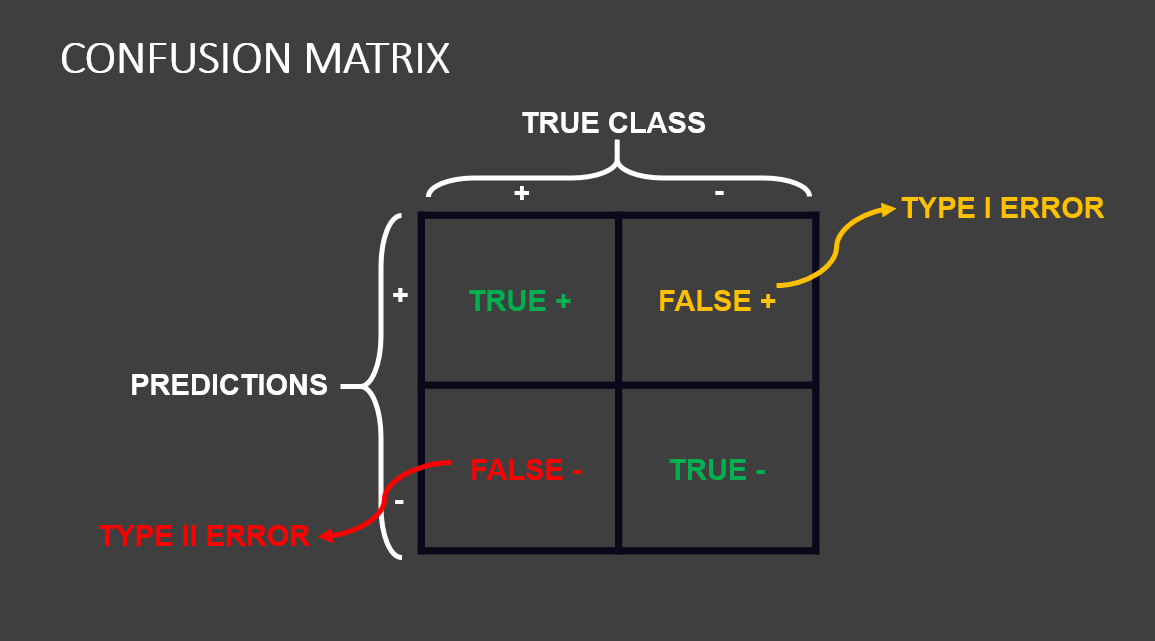

In [24]:
# serialize model to JSON
model_json = cnn.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
cnn.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [25]:
score = cnn.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy: {} %'.format(score[1]*100))

395/395 [==============================] - 3s 9ms/step - loss: 0.2808 - accuracy: 0.9421
Test Accuracy: 94.21219229698181 %


In [26]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [27]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

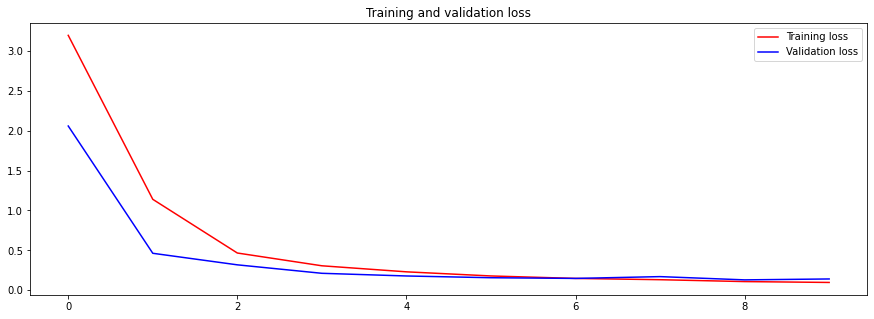

In [28]:
epochs = range(len(accuracy))
plt.figure(figsize=(15,5))
plt.plot(epochs,loss,'r-',label='Training loss')
plt.plot(epochs,val_loss,'b-',label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

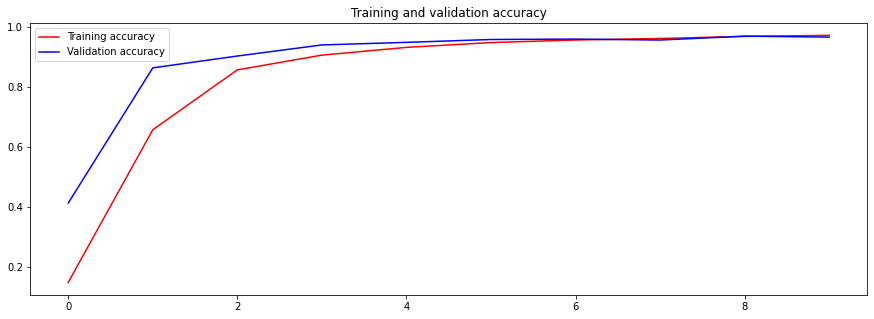

In [29]:
epochs = range(len(accuracy))
plt.figure(figsize=(15,5))
plt.plot(epochs,accuracy,'r-',label='Training accuracy')
plt.plot(epochs,val_accuracy,'b-',label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

395/395 [==============================] - 3s 8ms/step


<AxesSubplot:>

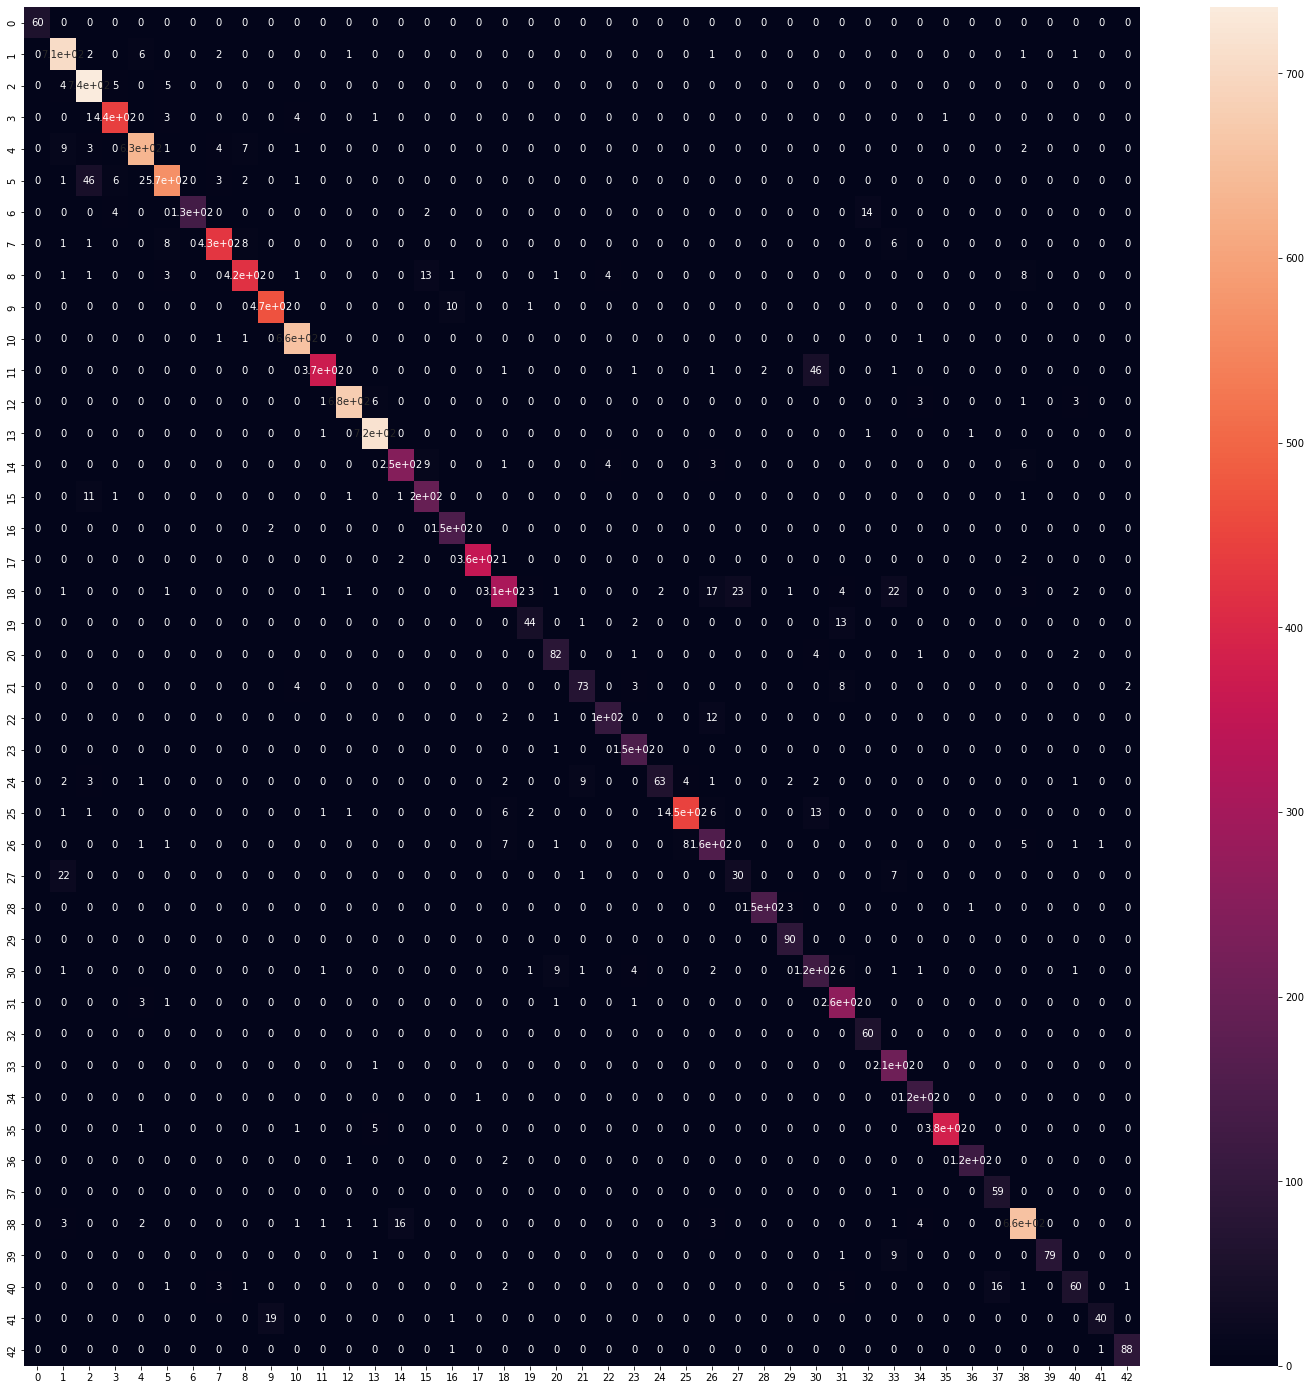

In [30]:
predicted_classes = cnn.predict(X_test_gray_norm)
predicted_classes = np.argmax(predicted_classes,1)

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

In [31]:
print('Accuracy Score : {} %'.format(accuracy_score(y_test,predicted_classes)*100))

Accuracy Score : 94.21219319081551 %


In [32]:
print(classification_report(y_test,predicted_classes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       0.94      0.98      0.96       720
           2       0.91      0.98      0.95       750
           3       0.96      0.98      0.97       450
           4       0.98      0.96      0.97       660
           5       0.96      0.90      0.93       630
           6       1.00      0.87      0.93       150
           7       0.97      0.95      0.96       450
           8       0.96      0.93      0.94       450
           9       0.96      0.98      0.97       480
          10       0.98      1.00      0.99       660
          11       0.98      0.88      0.93       420
          12       0.99      0.98      0.99       690
          13       0.98      1.00      0.99       720
          14       0.93      0.91      0.92       270
          15       0.89      0.93      0.91       210
          16       0.92      0.99      0.95       150
          17       1.00    

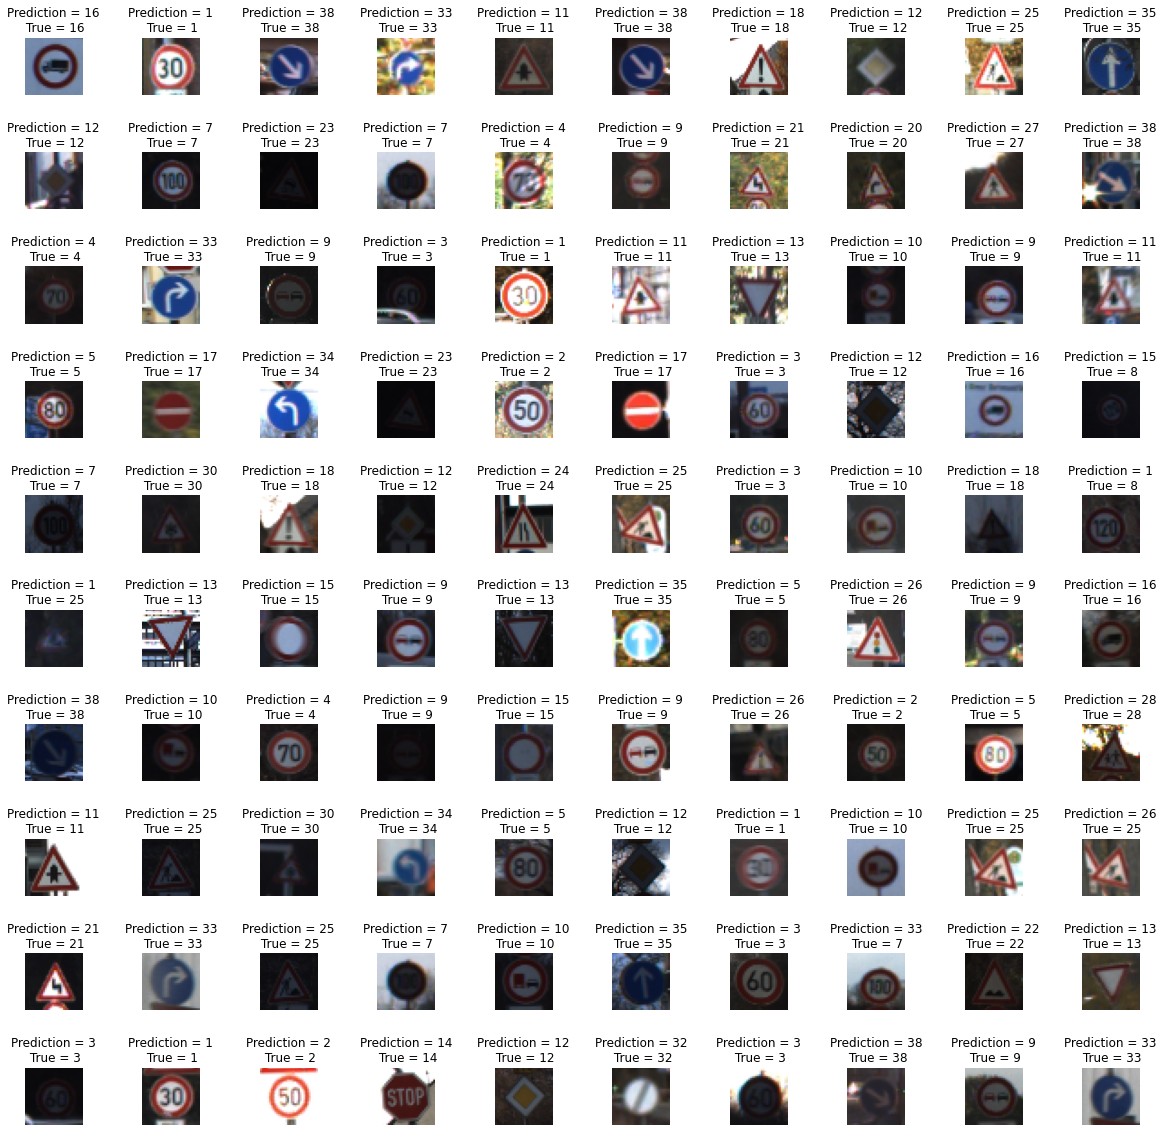

In [34]:
L = 10
W = 10

fig, axes = plt.subplots(L, W, figsize = (20, 20))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1,hspace=1)    

# APPENDIX

- In this case study, we want to classify images of traffic signs using deep Convolutional Neural Networks (CNNs).
- The dataset consists of 43 different classes of images. 
- Classes are as listed below: 
  - 0 = Speed limit (20km/h) 
  - 1 = Speed limit (30km/h)
  - 2 = Speed limit (50km/h) 
  - 3 = Speed limit (60km/h)
  - 4 = Speed limit (70km/h) 
  - 5 = Speed limit (80km/h)
  - 6 = End of speed limit (80km/h)
  - 7 = Speed limit (100km/h)
  - 8 = Speed limit (120km/h)
  - 9 = No passing
  - 10 = No passing for vehicles over 3.5 metric tons
  - 11 = Right-of-way at the next intersection
  - 12 = Priority road
  - 13 = Yield
  - 14 = Stop
  - 15 = No vehicles
  - 16 = Vehicles over 3.5 metric tons prohibited
  - 17 = No entry
  - 18 = General caution
  - 19 = Dangerous curve to the left
  - 20 = Dangerous curve to the right
  - 21 = Double curve
  - 22 = Bumpy road
  - 23 = Slippery road
  - 24 = Road narrows on the right
  - 25 = Road work
  - 26 = Traffic signals
  - 27 = Pedestrians
  - 28 = Children crossing 
  - 29 = Bicycles crossing
  - 30 = Beware of ice/snow
  - 31 = Wild animals crossing
  - 32 = End of all speed and passing limits
  - 33 = Turn right ahead
  - 34 = Turn left ahead
  - 35 = Ahead only
  - 36 = Go straight or right
  - 37 = Go straight or left
  - 38 = Keep right
  - 39 = Keep left
  - 40 = Roundabout mandatory
  - 41 = End of no passing
  - 42 = End of no passing by vehicles over 3.5 metric tons

- Citation
J. Stallkamp, M. Schlipsing, J. Salmen, and C. Igel. The German Traffic Sign Recognition Benchmark: A multi-class classification competition. In Proceedings of the IEEE International Joint Conference on Neural Networks, pages 1453–1460. 2011. 
@inproceedings{Stallkamp-IJCNN-2011, author = {Johannes Stallkamp and Marc Schlipsing and Jan Salmen and Christian Igel}, booktitle = {IEEE International Joint Conference on Neural Networks}, title = {The {G}erman {T}raffic {S}ign {R}ecognition {B}enchmark: A multi-class classification competition}, year = {2011}, pages = {1453--1460} }